### Numpy basics

In [1]:
import numpy as np
import numpy.random as rnp
import matplotlib.pyplot as plt
import time as tm
rnp.seed = 123

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [10]:
m = np.arange(12).reshape((3, 4))
print(m)
row_mean = [np.mean(m[i, :]) for i in range(3)]
column_mean = [np.mean(m[:, i]) for i in range(4)]
overall_mean = np.mean(np.arange(12))
print("row_means:", row_mean)
print("column_means:", column_mean)
print("overall_mean:", overall_mean)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
row_means: [1.5, 5.5, 9.5]
column_means: [4.0, 5.0, 6.0, 7.0]
overall_mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operations



In [15]:
# 1
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
print(np.outer(u, v))

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [4]:
# 2
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
out = [v*a for a in u]
out

[array([2, 4, 6, 8]),
 array([ 6, 12, 18, 24]),
 array([10, 20, 30, 40]),
 array([14, 28, 42, 56])]

In [39]:
# 3
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8]).reshape(4, 1)
m = np.transpose(u*v)
m

array([[ 2,  4,  6,  8],
       [ 6, 12, 18, 24],
       [10, 20, 30, 40],
       [14, 28, 42, 56]])

3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [5]:
rm = rnp.random_sample((10, 6))
print("Random matrix: \n", rm)
zero_rows = np.any(rm < 0.1, 1)
rm[zero_rows] = 0
print("Removed 0.1-elements rows: \n", rm)

Random matrix: 
 [[0.82385608 0.48885713 0.44340519 0.00562344 0.32595222 0.24635307]
 [0.21341183 0.88440488 0.93983648 0.35523653 0.84346434 0.20180775]
 [0.6331178  0.49850863 0.66830848 0.8494884  0.55987003 0.53961179]
 [0.62158527 0.782766   0.30431666 0.05362669 0.52922369 0.03458137]
 [0.01381688 0.68852398 0.44361949 0.51862145 0.21842872 0.27084436]
 [0.63202802 0.42370164 0.12425809 0.0517466  0.96774753 0.91258543]
 [0.77591772 0.80804703 0.12750554 0.17064713 0.05591535 0.63844009]
 [0.32278441 0.64417668 0.99278063 0.11931248 0.00716357 0.48335059]
 [0.8841487  0.02395324 0.29174014 0.67496443 0.30006576 0.17601034]
 [0.15443626 0.33570308 0.40973623 0.16914766 0.36691831 0.62763825]]
Removed 0.1-elements rows: 
 [[0.         0.         0.         0.         0.         0.        ]
 [0.21341183 0.88440488 0.93983648 0.35523653 0.84346434 0.20180775]
 [0.6331178  0.49850863 0.66830848 0.8494884  0.55987003 0.53961179]
 [0.         0.         0.         0.         0.        

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

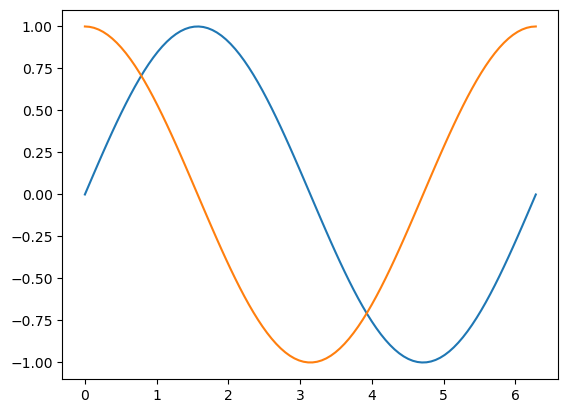

In [79]:
l = np.linspace(0, 2*np.pi, 100)
l1 = l[::10]
l2 = l1[::-1]
l3 = [j for j in l if np.abs(np.cos(j)-np.sin(j)) < 0.1]

plt.plot(l, np.sin(l))
plt.plot(l, np.cos(l))


5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
# 1
v = np.array([j for j in range(1, 11)])
m = np.array([ v*i for i in range(1, 11)])
trace = 0
for i in range(0, 10): trace += m[i, i]
print(trace)

# 2
indices = [(i,j) for i in range(0, 10) for j in range(0, 10) if i + j == 9]
antidiag = np.array([])
for I in indices: antidiag = np.append(antidiag, m[I])
print(antidiag)

# 3
indices_ = [(i,j) for i in range(0, 10) for j in range(0, 10) if j + 1 == i]
offset = np.array([])
for I in indices_: offset = np.append(offset, m[I])
print(offset)


385
[10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]
[ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [18]:
positions = [0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
grid = np.array([(np.array(positions) - j) for j in positions]) * 1.6
print(grid)

[[    0.    316.8   484.8  1177.6  1393.6  1880.   2360.   2470.4  3060.8
   3916.8]
 [ -316.8     0.    168.    860.8  1076.8  1563.2  2043.2  2153.6  2744.
   3600. ]
 [ -484.8  -168.      0.    692.8   908.8  1395.2  1875.2  1985.6  2576.
   3432. ]
 [-1177.6  -860.8  -692.8     0.    216.    702.4  1182.4  1292.8  1883.2
   2739.2]
 [-1393.6 -1076.8  -908.8  -216.      0.    486.4   966.4  1076.8  1667.2
   2523.2]
 [-1880.  -1563.2 -1395.2  -702.4  -486.4     0.    480.    590.4  1180.8
   2036.8]
 [-2360.  -2043.2 -1875.2 -1182.4  -966.4  -480.      0.    110.4   700.8
   1556.8]
 [-2470.4 -2153.6 -1985.6 -1292.8 -1076.8  -590.4  -110.4     0.    590.4
   1446.4]
 [-3060.8 -2744.  -2576.  -1883.2 -1667.2 -1180.8  -700.8  -590.4     0.
    856. ]
 [-3916.8 -3600.  -3432.  -2739.2 -2523.2 -2036.8 -1556.8 -1446.4  -856.
      0. ]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

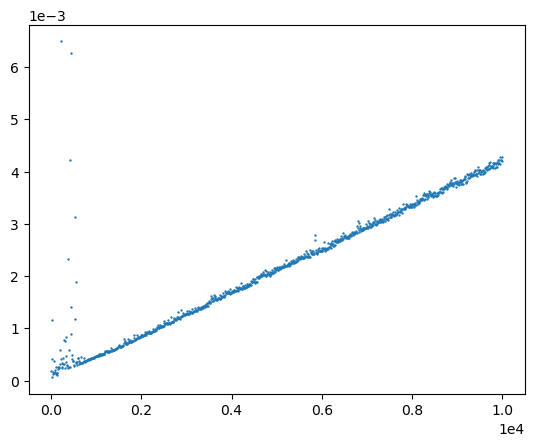

In [48]:
#No optimization
def computePrime(N):
    list = np.arange(N)
    mask = np.full(N, True)
    for i in np.arange(2, int(N/2)):
        multiples = np.arange(2*i, N, i)
        mask[multiples] = False
    return list[mask]

domain = np.arange(1, 10000, 10)
times = []
for N in domain:
    start = tm.time()
    computePrime(N)
    end = tm.time()
    times.append(end - start)

plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.scatter(domain, times, s=0.5)

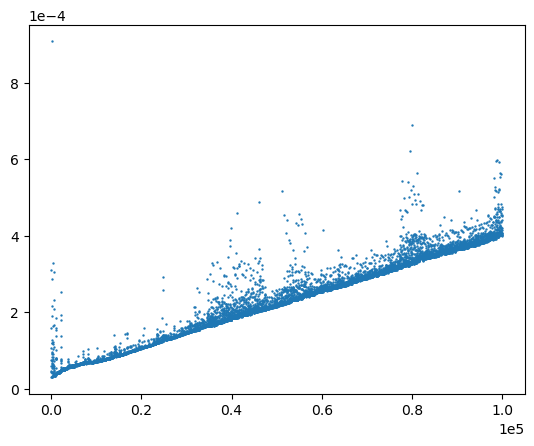

In [49]:
#With optimization

def compPrimeOpt(N):
    list = np.arange(N)
    mask = np.full(N, True)
    temp = np.arange(2, N)
    for i in np.arange(2, int(np.sqrt(N))):
        if mask[i]:
            multiples = np.arange(i**2, N, i)
            mask[multiples] = False
    return list[mask]


domain = np.arange(1, 100000, 10)
times = []
for N in domain:
    start = tm.time()
    compPrimeOpt(N)
    end = tm.time()
    times.append(end - start)

plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.scatter(domain, times, s=0.5)

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

Text(0, 0.5, 'msd')

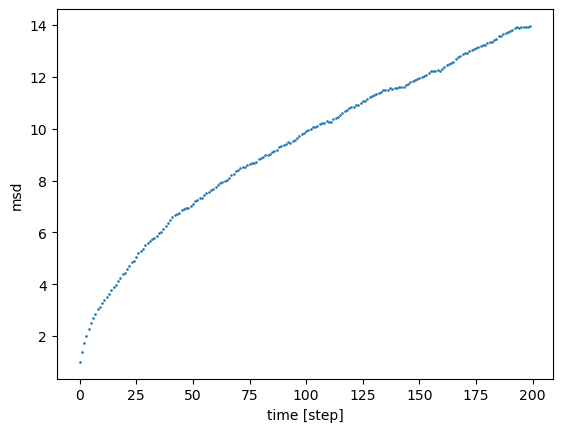

In [24]:
walkers = 1000
step = 200
diffusion_matrix = np.zeros((walkers, step))
for i in range(step):
    diffusion_matrix[:,i] = diffusion_matrix[:, i-1] + rnp.choice((-1, 1), walkers)
squared_diffusion = diffusion_matrix**2
msd = [np.mean(squared_diffusion[:,i]) for i in range(step)]

plt.scatter(np.arange(step), np.sqrt(msd), s=0.75)
plt.xlabel("time [step]")
plt.ylabel("msd")


9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

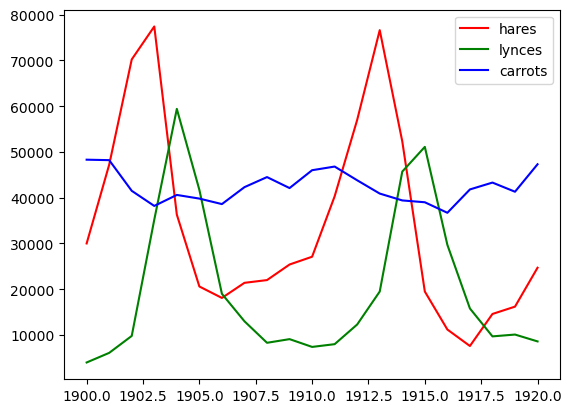

In [44]:
file_name = "populations.txt"
file = np.loadtxt(file_name)
# year	hare	lynx	carrot
year = file[:, 0]
hare = file[:, 1]
lynx = file[:, 2]
carrot = file[:, 3]

plt.plot(year, hare, label='hares', c='red')
plt.plot(year, lynx, label='lynces', c='green')
plt.plot(year, carrot, label='carrots', c='blue')
plt.legend()
